__This notebook is not the final used version__. 
The final used version can be found in the __vref_walkability_index repository.__
__Notebook 02_PV_07_GDL_physical_variables_to_edges.ipynb__

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

In [2]:
hex_schema = "raster_analysis"
hex_tablee = "ndvi_analysis_hex"
hex_id = "hex_id"
c1 = 'Guadalajara'
n = '11'
query_ndvi = f'''
SELECT * FROM {hex_schema}.{hex_tablee} 
WHERE "city" IN ('{c1}') 
AND "res" = {n}
'''
intt_gdl = aup.gdf_from_query(query_ndvi, geometry_col='geometry')
intt_gdl.head(10)

,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city
0,8b49aa24c78bfff,"POLYGON ((-103.52481 20.48558, -103.52464 20.4...",11,0.391447,0.193097,0.358138,0.676304,0.177307,0.498997,-0.003090,Guadalajara
1,8b49aa24c448fff,"POLYGON ((-103.5252 20.48168, -103.52502 20.48...",11,0.315914,0.157966,0.261515,0.562541,0.162010,0.400530,-0.002139,Guadalajara
2,8b49aa24c603fff,"POLYGON ((-103.52699 20.48649, -103.52681 20.4...",11,0.344116,0.179186,0.298868,0.591389,0.162798,0.428591,-0.002786,Guadalajara
3,8b49aa24c634fff,"POLYGON ((-103.52628 20.48447, -103.52611 20.4...",11,0.396972,0.208333,0.355566,0.671485,0.176643,0.494842,-0.002999,Guadalajara
4,8b49aa24c4ebfff,"POLYGON ((-103.5224 20.48244, -103.52223 20.48...",11,0.298372,0.151729,0.261781,0.492060,0.121316,0.370744,-0.002187,Guadalajara
5,8b49aa24c7b5fff,"POLYGON ((-103.52373 20.48279, -103.52355 20.4...",11,0.381553,0.167574,0.339624,0.628495,0.212480,0.416015,-0.002338,Guadalajara
6,8b49aa24eb4dfff,"POLYGON ((-103.52202 20.48633, -103.52185 20.4...",11,0.340420,0.178152,0.296645,0.606339,0.165304,0.441035,-0.002023,Guadalajara
7,8b49aa24c72bfff,"POLYGON ((-103.5287 20.48295, -103.52852 20.48...",11,0.343121,0.116943,0.317583,0.471453,0.233667,0.237786,-0.002109,Guadalajara
8,8b49aa24c4ddfff,"POLYGON ((-103.52098 20.48306, -103.52081 20.4...",11,0.293946,0.135483,0.261396,0.494164,0.154999,0.339165,-0.001891,Guadalajara
9,8b49aa24c4c1fff,"POLYGON ((-103.5215 20.48236, -103.52133 20.48...",11,0.273084,0.127320,0.257313,0.418208,0.127429,0.290779,-0.002142,Guadalajara


### Download network

In [10]:
type = "urban"
city = "Guadalajara"
query_urban = f"SELECT * FROM hexgrid.hexgrid_8_city_2020 WHERE \"city\" LIKE \'{city}\' AND \"type\" LIKE \'{type}\'"

In [4]:
hex_gdf = aup.gdf_from_query(query_urban, geometry_col='geometry')
print(hex_gdf.shape)
hex_gdf.head(2)

(1132, 6)


,hex_id_8,geometry,CVEGEO,NOMGEO,city,type
0,88498c9421fffff,"POLYGON ((-103.28663 20.69309, -103.28209 20.6...",14039,Guadalajara,Guadalajara,urban
1,88498c9405fffff,"POLYGON ((-103.30025 20.68392, -103.29571 20.6...",14039,Guadalajara,Guadalajara,urban


In [5]:
_, nodes, edges = aup.graph_from_hippo(hex_gdf, schema='osmnx', edges_folder='edges_osmnx_23_line', nodes_folder='nodes_osmnx_23_point')

In [6]:
print(edges.shape)
edges.head(2)

(414636, 16)


,,,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service,city
u,v,key,,,,,,,,,,,,,,,,
4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,"LINESTRING (-103.50987 20.45796, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara
4303977503,4303977514,0,431149502,True,None,None,residential,None,49.994,"LINESTRING (-103.51136 20.45798, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara


In [7]:
edges = edges.reset_index()
edges

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service,city
0,4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,"LINESTRING (-103.50987 20.45796, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara
1,4303977503,4303977514,0,431149502,True,None,None,residential,None,49.994,"LINESTRING (-103.51136 20.45798, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara
2,4303977508,4303977503,0,431149546,True,None,None,residential,None,65.457,"LINESTRING (-103.51195 20.45817, -103.51136 20...",None,None,None,None,private,None,None,Guadalajara
3,4303977517,4303977508,0,431149546,True,None,None,residential,None,107.109,"LINESTRING (-103.51292 20.45849, -103.51195 20...",None,None,None,None,private,None,None,Guadalajara
4,4303977519,4303977505,0,431149521,True,None,None,residential,None,204.005,"LINESTRING (-103.51055 20.4585, -103.51005 20....",None,None,None,None,private,None,None,Guadalajara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414631,8669578133,8432758360,0,908170488,False,None,caminos de aceso,footway,None,20.283,"LINESTRING (-103.38285 20.52314, -103.38289 20...",None,None,None,None,None,None,None,Guadalajara
414632,8753025784,1754556621,0,163775733,False,None,Calle Centauro,residential,None,29.389,"LINESTRING (-103.38244 20.52586, -103.38216 20...",None,None,None,None,None,None,None,Guadalajara
414633,8760908969,6142976278,0,908170483,False,None,Veredas del parque,footway,None,46.802,"LINESTRING (-103.38288 20.52434, -103.38289 20...",None,None,None,None,None,None,None,Guadalajara
414634,8776316843,1754154719,0,163737788,True,None,Boulevard América del Sur,residential,None,2.927,"LINESTRING (-103.38176 20.51301, -103.38179 20...",None,None,None,None,None,None,None,Guadalajara


### sjoin para edges y ndvi

In [8]:
intt_gdl = intt_gdl.set_crs("EPSG:4326")
edges = edges.set_crs("EPSG:4326")

In [11]:
inter_join = gpd.sjoin(edges, intt_gdl, predicate='intersects')
inter_join.head(3)

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,...,hex_id,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city_right
0,4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,...,8b49aa241891fff,11,0.195943,0.075429,0.180098,0.323646,0.129969,0.193677,-0.001444,Guadalajara
0,4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,...,8b49aa241891fff,11,0.195943,0.075429,0.180098,0.323646,0.129969,0.193677,-0.001444,Guadalajara
0,4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,...,8b49aa24189cfff,11,0.197946,0.064450,0.192076,0.293695,0.139749,0.153945,-0.001611,Guadalajara


In [12]:
# Calcular el promedio de ndvi_mean para cada par único (u, v, key)
ndvi_mean_grouped = inter_join.groupby(["u", "v","key"])["ndvi_mean"].mean().reset_index()
ndvi_mean_grouped.head(3)

,u,v,key,ndvi_mean
0,28751344,28757777,0,0.151797
1,28751344,1610958191,0,0.119335
2,28753224,1601906764,0,0.103413


In [13]:
edges_ndvi = edges.merge(ndvi_mean_grouped, on=["u", "v","key"], how="left")

edges_ndvi.head(3)

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service,city,ndvi_mean
0,4303977502,4303977514,0,431149558,True,None,None,residential,None,147.496,"LINESTRING (-103.50987 20.45796, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara,0.206181
1,4303977503,4303977514,0,431149502,True,None,None,residential,None,49.994,"LINESTRING (-103.51136 20.45798, -103.51121 20...",None,None,None,None,private,None,None,Guadalajara,0.261142
2,4303977508,4303977503,0,431149546,True,None,None,residential,None,65.457,"LINESTRING (-103.51195 20.45817, -103.51136 20...",None,None,None,None,private,None,None,Guadalajara,0.261257


In [14]:
edges_ndvi.ndvi_mean.isna().sum()

np.int64(1772)

In [15]:
edges_ndvi = edges_ndvi[["u", "v","key", "ndvi_mean", "city","geometry"]].copy()
edges_ndvi.fillna(0,inplace=True)
edges_ndvi.head(3)

,u,v,key,ndvi_mean,city,geometry
0,4303977502,4303977514,0,0.206181,Guadalajara,"LINESTRING (-103.50987 20.45796, -103.51121 20..."
1,4303977503,4303977514,0,0.261142,Guadalajara,"LINESTRING (-103.51136 20.45798, -103.51121 20..."
2,4303977508,4303977503,0,0.261257,Guadalajara,"LINESTRING (-103.51195 20.45817, -103.51136 20..."


<Axes: >

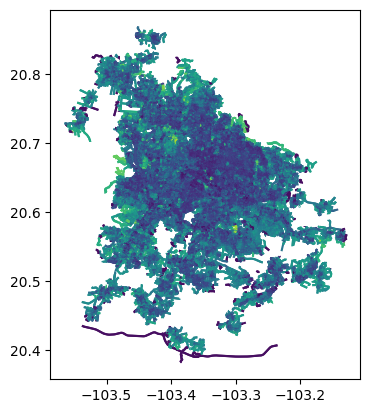

In [16]:
edges_ndvi.plot('ndvi_mean')

## Save data

In [17]:
edges_ndvi.to_file('../../../data/processed/volvo/ndvi_edges_amg_v1.geojson')